In [14]:
import pandas as pd
import obspy as op
import numpy as np
%matplotlib inline

In [21]:
from calculate_features_DAS import *
from ts_tools import despike, remove_median

Attempt to load a seismogram into a pandas df and create a column that classifies based in time. Each time segment is associated with one value of soil moisture content, for example 

In [17]:
all_data = pd.read_csv("Fnames_soilM_interp.csv")
lineCSN = all_data[all_data['Line'] == "LineCSN"]
lineCSN_M3 = lineCSN[['file_name','DateTime','M3_20_Avg_interp','tsince_start']]
lineCSN_M3.reset_index(drop=True,inplace=True)
lineCSN_M3['DateTime'] = pd.to_datetime(lineCSN_M3['DateTime'])
lineCSN_M3.set_index('DateTime',inplace=True)

/home/rmartinshort/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [26]:
lineCSN_M3.head()
fnames = list(lineCSN['file_name'])

In [27]:
datadir = "/media/rmartinshort/My Book/4Robert"
import os
cwd = os.getcwd()
os.chdir(datadir)

Maybe we should calculate features for each one minute chunk of the data, as contained within the mseed files? 
or chunk at a different frequency?

In [43]:
ltrace = 100 #number of traces to loop over
nchannels = 20 #number of channels to extract
sma_1_comps = np.full([ltrace,nchannels],np.nan)
means = np.full([ltrace,nchannels],np.nan)
medians = np.full([ltrace,nchannels],np.nan)
iqrs = np.full([ltrace,nchannels],np.nan)
minmaxs = np.full([ltrace,nchannels],np.nan)
variances = np.full([ltrace,nchannels],np.nan)
stds = np.full([ltrace,nchannels],np.nan)
mads = np.full([ltrace,nchannels],np.nan)
rmss = np.full([ltrace,nchannels],np.nan)
skews = np.full([ltrace,nchannels],np.nan)
kurtosiss = np.full([ltrace,nchannels],np.nan)
k2s = np.full([ltrace,nchannels],np.nan)
Xcrossings = np.full([ltrace,nchannels],np.nan)
cavs = np.full([ltrace,nchannels],np.nan)
Zs = np.full([ltrace,nchannels],np.nan)
energys = np.full([ltrace,nchannels],np.nan)

In [54]:
traces = range(75,95)

i = 0
file_name_list = []
for fname in fnames[:100]:
    
    #Save the name of the file 
    
    file_name_list.append(fname[2:])
    
    #Read in file 
    
    f = op.read(fname,format='mseed')
    
    #LOOP OVER THE CHANNELS WE WANT TO EXTRACT, SELECT THE CHANNEL, CALCULATE FEATURES AND 
    #APPEND TO FEATURE MATRIX
    
    j = 0
    for traceid in traces:
    
        trace = f[traceid] 
        trace = remove_median(trace)
        trace = despike(trace)
        st = op.UTCDateTime(trace.stats.starttime)
        et = op.UTCDateTime(trace.stats.endtime)
        time__ = np.linspace(0,(et-st),trace.stats.npts)
        inslice = trace.data
    
        if not np.isnan(inslice).any():
            
            sma_1_comps[i,j], means[i,j], medians[i,j], iqrs[i,j],\
                minmaxs[i,j], variances[i,j], stds[i,j], mads[i,j], rmss[i,j],\
                skews[i,j], kurtosiss[i,j], k2s[i,j], Xcrossings[i,j], cavs[i,j],\
                Zs[i,j], energys[i,j] = features_rt(time__,inslice)
        else:
            print ('nan found in %s' %fname)
        
        j += 1
    i += 1

In [55]:
channel_names = []
for traceid in traces:
    name = 'channel_%i' %traceid
    channel_names.append(name)

df = pd.DataFrame(sma_1_comps,columns=channel_names)
df['file_name'] = file_name_list

In [56]:
df

,channel_75,channel_76,channel_77,channel_78,channel_79,channel_80,channel_81,channel_82,channel_83,channel_84,...,channel_86,channel_87,channel_88,channel_89,channel_90,channel_91,channel_92,channel_93,channel_94,file_name
0,700.834126,677.821131,633.893034,639.029028,595.576927,638.904173,691.641854,727.230798,759.288835,915.306555,...,1003.401001,1026.388249,1044.043362,1134.923122,1064.226367,1094.030467,1111.887084,899.039368,888.810490,20160805180738_40_Hz_LineCSN.mseed
1,693.904004,681.966410,617.616959,631.666706,611.277271,623.706778,610.630270,709.681285,750.829968,819.199659,...,907.345769,914.462857,941.683052,1025.523359,947.653366,959.786882,1190.441621,986.789636,904.892450,20160805180838_40_Hz_LineCSN.mseed
2,1046.957529,1005.015790,882.650483,916.811871,920.896821,943.384483,961.345861,1033.699979,1101.252087,1190.937301,...,1427.756281,1450.003169,1436.052228,1649.422372,1352.054109,1398.024423,1453.917615,1404.094241,1244.973153,20160805180938_40_Hz_LineCSN.mseed
3,1350.025534,1152.343405,1058.827299,1090.381628,1107.928687,1107.962081,1148.930749,1308.448560,1345.033505,1416.196883,...,1686.852779,1688.811298,1496.414662,1489.679658,1362.752651,1485.716509,1507.394892,1452.879676,1270.569634,20160805181038_40_Hz_LineCSN.mseed
4,474.582052,450.452767,415.873356,444.918599,430.719208,456.420614,476.107442,557.763603,565.085052,584.761160,...,651.510569,651.076570,591.436293,582.322602,586.461280,614.614560,612.049370,578.974906,536.664302,20160805181138_40_Hz_LineCSN.mseed
5,364.779787,398.030835,371.895949,396.393911,394.220642,458.815878,521.335949,538.752241,522.578712,511.735103,...,541.959657,548.598885,522.641772,533.059565,519.366174,667.990837,677.609148,776.363405,560.937437,20160805181238_40_Hz_LineCSN.mseed
6,1309.154863,1397.816611,1315.022337,1255.973194,1260.185162,1239.302221,1465.015415,1532.508031,1566.656564,1672.016113,...,1901.304191,1939.593764,1726.365251,1694.148096,1740.121710,1788.971692,1795.683182,1721.129499,1617.388644,20160805181338_40_Hz_LineCSN.mseed
7,747.528676,853.525726,799.105057,774.982828,760.531619,728.737287,713.664808,1018.281878,1184.526879,1189.948075,...,1223.778185,1223.863963,1043.124133,1025.508474,1083.128220,1109.419006,1111.536502,1051.098935,962.520703,20160805181438_40_Hz_LineCSN.mseed
8,2435.952054,2317.934774,2293.349221,2186.139807,2134.791900,2104.806693,2109.148138,2408.389428,2479.954121,2662.604725,...,3034.038123,3056.124847,2827.591455,2834.967092,3002.073965,3138.917066,3167.237562,2962.321343,2945.847647,20160805181538_40_Hz_LineCSN.mseed
9,605.588970,601.272970,580.789794,526.348116,536.938942,538.124462,562.581510,603.475372,633.157036,769.128788,...,896.274005,895.627658,808.955272,752.563706,766.275061,811.545678,792.740514,751.528756,765.993563,20160805181638_40_Hz_LineCSN.mseed


In [8]:
stream = op.read('channel_94_clipped.mseed',format='mseed')

In [9]:
for trace in stream:
    st = trace.stats.starttime
    et = trace.stats.endtime
    print(st,et)

2016-09-03T00:00:05.298907Z 2016-09-03T03:41:05.273907Z
2016-09-03T03:42:05.298907Z 2016-09-03T07:00:05.273907Z
2016-09-03T10:09:05.298907Z 2016-09-04T07:00:05.273907Z
2016-09-04T10:09:05.298907Z 2016-09-05T07:00:05.273907Z
2016-09-05T10:09:05.298907Z 2016-09-05T15:49:08.698907Z
2016-09-05T21:35:15.229859Z 2016-09-06T07:00:15.204859Z
2016-09-06T10:09:15.230491Z 2016-09-07T07:00:15.205491Z
2016-09-07T10:09:15.230491Z 2016-09-08T07:00:15.205491Z
2016-09-08T10:09:15.230491Z 2016-09-08T19:44:24.580491Z
2016-09-08T19:53:14.344082Z 2016-09-09T07:00:14.319082Z
2016-09-09T10:09:14.337563Z 2016-09-10T00:00:14.312563Z


In [10]:
len(stream)

11

In [15]:
stream.merge(fill_value=np.nan)

1 Trace(s) in Stream:
FB.00094.00.FON | 2016-09-03T00:00:05.298907Z - 2016-09-10T00:00:14.323907Z | 40.0 Hz, 24192362 samples

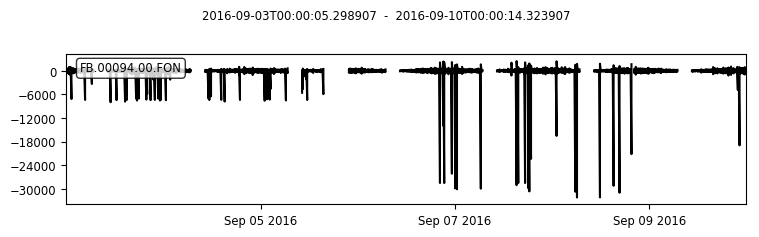

In [16]:
stream.plot()